In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

vector = ('00','01','03','09','13','14','18','19','20','21')
h = 0.732
fo=open('/home/ornela/python/centros.dat','w')

snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')

    for i in range(0,10):
        cm1 = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value
        
        if i == 0:
            pstr = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
            vel  = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Velocities'].value
            masa = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Masses'].value
            cm = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value
            
#---------paso las coordenadas respecto al centro de la galaxia-------
            xstr = (pstr[:,0]-cm[0])/h
            ystr = (pstr[:,1]-cm[1])/h
            zstr = (pstr[:,2]-cm[2])/h
            r = np.sqrt(xstr**2+ystr**2+zstr**2)
        
#---------------masas------------------------------------------        
            masa = masa/h
        
            rgal=0.15*r200
        
            limit = np.where(r<rgal)
            r_sort = np.sort(r[limit])
            r_indice = np.argsort(r[limit])
                
            Mc = np.cumsum((masa[limit])[r_indice])
            Mgal = Mc[-1]
               
            razon = Mc/Mgal
            noventa, = np.where(razon < 0.9)
            cincuenta, = np.where(razon < 0.5)
        
            r90 = r_sort[noventa]
            r50 = r_sort[cincuenta]
#------------------------------------------------------------------        
##esto sirve si quiero hacer una submuestra de mi conjunto de datos
       
            veloc,=np.where(r<r50[-1])
        
#----------componentes de la velocidad del centro de masa------------
            vxcm = sum(masa[veloc]*vel[veloc,0])/sum(masa[veloc])
            vycm = sum(masa[veloc]*vel[veloc,1])/sum(masa[veloc])
            vzcm = sum(masa[veloc]*vel[veloc,2])/sum(masa[veloc])
        
#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
            vx = vel[:,0] - vxcm
            vy = vel[:,1] - vycm
            vz = vel[:,2] - vzcm
        
# utilizo una matriz de rotacion de modo que el plano xy coincida aprox con el plano del disco
# rot.rot, el primer rot es como yo le llamo arriba cuando importo, el segundo rot tiene que ver
#con como se llama la funcion adentro del archivo rotation
        
            e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(masa,xstr,ystr,zstr,vx,vy,vz,r90[-1])

##posiciones de los centros de las galaxias
##como lo de arriba me da los versores hago las posiciones con esto 

        xcm = (cm1[0]-cm[0])/h
        ycm = (cm1[1]-cm[1])/h
        zcm = (cm1[2]-cm[2])/h

        xn = e1x*xcm + e1y*ycm + e1z*zcm
        yn = e2x*xcm + e2y*ycm + e2z*zcm
        zn = e3x*xcm + e3y*ycm + e3z*zcm

        fo.write(str('%12.6f'% xn)+'\t'+
            str('%12.6f'% yn)+'\t'+
            str('%12.6f'% zn)+'\n')
        fo.flush()
        

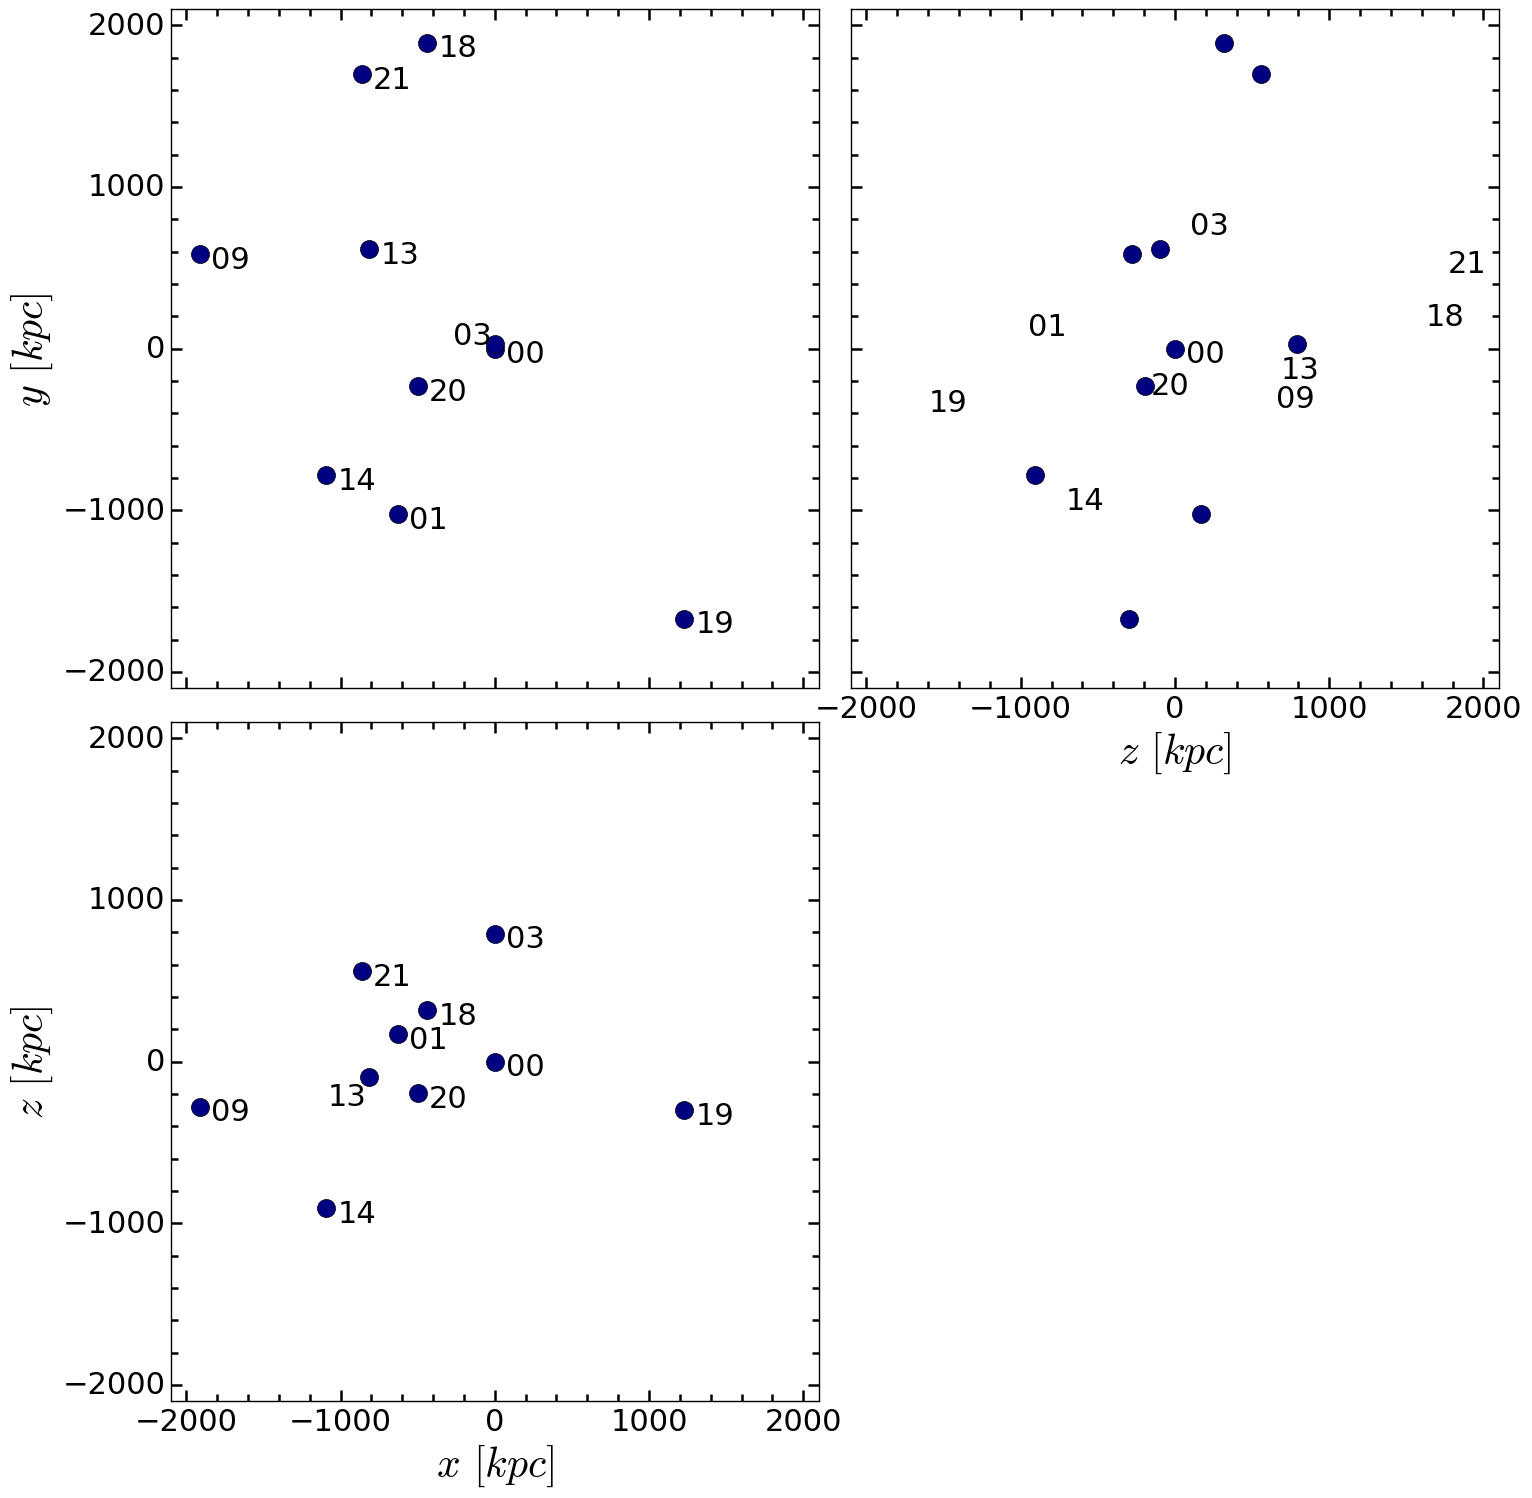

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

cm=np.loadtxt('/home/ornela/python/centros.dat')
vector = ('00','01','03','09','13','14','18','19','20','21')
x =cm[:,0]
y =cm[:,1]
z =cm[:,2]

fig=plt.figure(1, figsize=(16,16))
fig.subplots_adjust(bottom=0.08, left =0.12, right = 0.95, top = 0.95, wspace=0.05, hspace= 0.05)
#fig.subplots_adjust(bottom=0.12, left =0.02, right = 0.98, top = 0.95)
        
ax=fig.add_subplot(221)
ax.plot(x,y,'o',markersize=13, color='navy')
#plt.xlabel(u'$x$ $[kpc]$', fontsize=30)
plt.ylabel(u'$y$ $[kpc]$', fontsize=30)
#ax.set_title('sh_0'+ str('%s'%vector[i]), fontsize=30)
ax.set_xticklabels([])
ax.minorticks_on()
ax.set_xlim(-2100,2100)
ax.set_ylim(-2100,2100)
ax.tick_params( labelsize=22)
ax.tick_params('both', length=5, width=1.8,which='minor')
ax.tick_params('both', length=8, width=1.8,which='major')
for i in range(0,10):
    if i == 2:
        plt.annotate(str('%s'%vector[i]), xy=(x[i],y[i]), 
                     xytext=(-30, 0), textcoords='offset points', fontsize=22)
    else:
        plt.annotate(str('%s'%vector[i]), xy=(x[i],y[i]), 
                     xytext=(+8, -10), textcoords='offset points', fontsize=22)

        
ax=fig.add_subplot(222)
ax.plot(z,y,'o',markersize=13, color='navy')
plt.xlabel(u'$z$ $[kpc]$', fontsize=30)
#ax.set_title('sh_0'+ str('%s'%vector[i]), fontsize=30)
ax.minorticks_on()
ax.set_yticklabels([])
ax.set_xlim(-2100,2100)
ax.set_ylim(-2100,2100)
ax.tick_params( labelsize=22)
ax.tick_params('both', length=5, width=1.8,which='minor')
ax.tick_params('both', length=8, width=1.8,which='major')
for i in range(0,10):
    if i == 6:
        plt.annotate(str('%s'%vector[i]), xy=(y[i],z[i]), 
                     xytext=(-30, -20), textcoords='offset points', fontsize=22)
    else:
        plt.annotate(str('%s'%vector[i]), xy=(y[i],z[i]), 
                     xytext=(+8, -10), textcoords='offset points', fontsize=22)
           
ax=fig.add_subplot(223)
ax.plot(x,z,'o',markersize=13, color='navy')
plt.ylabel(u'$z$ $[kpc]$', fontsize=30)
plt.xlabel(u'$x$ $[kpc]$', fontsize=30)
#ax.set_title('sh_0'+ str('%s'%vector[i]), fontsize=30)
ax.minorticks_on()
ax.set_xlim(-2100,2100)
ax.set_ylim(-2100,2100)
ax.tick_params( labelsize=22)
ax.tick_params('both', length=5, width=1.8,which='minor')
ax.tick_params('both', length=8, width=1.8,which='major')
for i in range(0,10):
    if i == 4:
        plt.annotate(str('%s'%vector[i]), xy=(x[i],z[i]), 
                     xytext=(-30, -20), textcoords='offset points', fontsize=22)
    else:
        plt.annotate(str('%s'%vector[i]), xy=(x[i],z[i]), 
                     xytext=(+8, -10), textcoords='offset points', fontsize=22)



"""ax = fig.add_subplot(224, projection='3d')
ax.scatter(x, y, z, marker='o', color='navy', s=150)
ax.minorticks_on()
ax.tick_params(labelsize=22)
ax.view_init(elev=30, azim=300)
ax.set_xlim(-2100,2100)
ax.set_ylim(-2100,2100)
ax.set_zlim(-2100,2100)
#ax.dist=12  
plt.grid(True)
ax.set_xlabel(r'$x$ $[kpc]$', fontsize=28)
ax.set_ylabel(r'$y$ $[kpc]$', fontsize=28)
ax.set_zlabel(r'$z$ $[kpc]$', fontsize=28)"""

#for i in range(0,10):
#    ax.text(x[i], y[i]+150, z[i],  '%s' %vector[i], size=20, zorder=1, color='k') 

fig.savefig('centros2.png', dpi = 100)
plt.show()


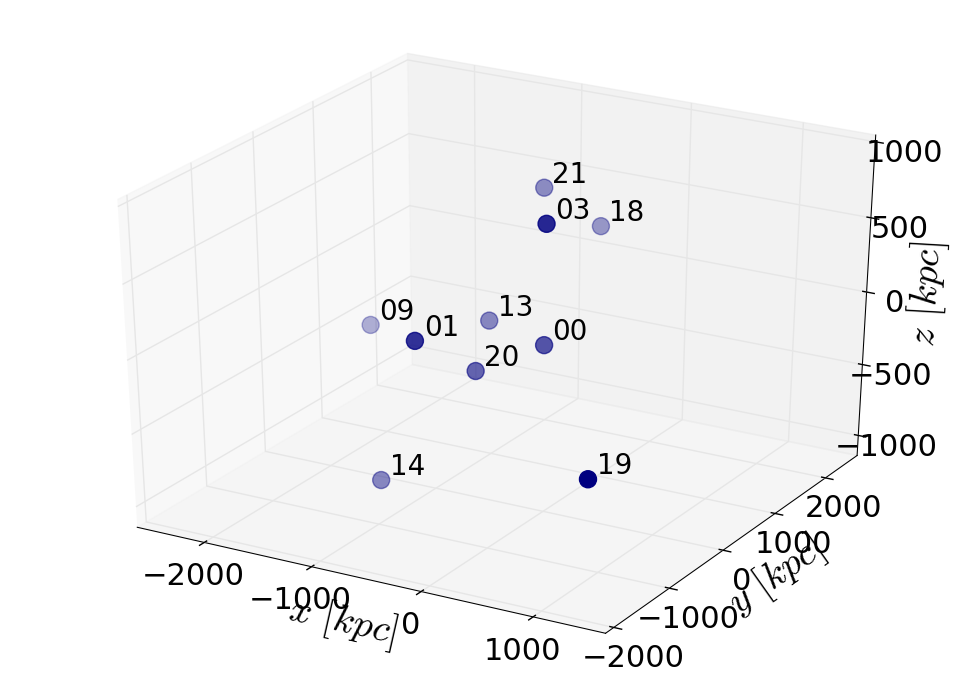

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

cm=np.loadtxt('/home/ornela/python/centros.dat')
vector = ('00','01','03','09','13','14','18','19','20','21')
x =cm[:,0]
y =cm[:,1]
z =cm[:,2]

fig=plt.figure(1, figsize=(10,8))
fig.subplots_adjust(bottom=0.12, left =0.02, right = 0.98, top = 0.95)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', color='navy', s=150)
ax.minorticks_on()
ax.tick_params(labelsize=22)
ax.view_init(elev=30, azim=300)
ax.set_xlim(-2550,1550)
ax.set_ylim(-2050,2550)
ax.set_zlim(-1100,1000)
#ax.dist=12  
plt.grid(True)
ax.set_xlabel(r'$x$ $[kpc]$', fontsize=28)
ax.set_ylabel(r'$y$ $[kpc]$', fontsize=28)
ax.set_zlabel(r'$z$ $[kpc]$', fontsize=28)

for i in range(0,10):
    ax.text(x[i], y[i]+150, z[i],  '%s' %vector[i], size=20, zorder=1, color='k') 

fig.savefig('centros.png', dpi = 100)
plt.show()

In [176]:
# Graficamos los centros
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

py.sign_in('ornemarioni', 'qh9ha47k9s')
cm=np.loadtxt('/home/ornela/python/centros.dat')

x =cm[:,0]
y =cm[:,1]
z =cm[:,2]
  

vector = ('00','01','03','09','13','14','18','19','20','21')

trace1 = go.Scatter3d(x=x,y=y,z=z, mode='markers', marker=dict(size=12, color= 'navy', 
                    line=dict(color='navy', width=0.5),opacity=0.9))

data= [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
ax1=py.iplot(fig, filename='simple-3d-scatter')
#ax1.layout({'xaxis.title': 'samples'})


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ornemarioni/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


AttributeError: 'PlotlyDisplay' object has no attribute 'text'